# 와인 데이터

- 와인의 등급에 영향을 미치는 성분들이 어떤 것들이 있는지 실험/연구 할 수 있는 데이터


- 화이트 와인은 달까?
- 와인의 등급에 영향을 미치는 성분들은 어떤 것이 있을까? => corr()
- 9등급 와인과 3등급 와인의 각각 성분 차이가 가장 큰 값은 무엇인가?
- 알콜 도수가 높을수록 와인 등급은 높아지는가?


1. 라이브러리 import/ 데이터 로드
2. 피처 엔지니어링 (데이터 EDA)
3. 모델 설정 및 학습
4. MLflow 설정 및 실행 => 메트릭, 파람 기록
5. 모델 결과 출력 및 모델 저장

In [2]:
# 필요한 import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# 데이터 로드
path = '/Users/a-08/Downloads/winequality.csv' # 절대/싱대 경로
df = pd.read_csv(path, index_col=0) # 0, 1 : False, True
df.head()

df.info()
df. describe()

<class 'pandas.core.frame.DataFrame'>
Index: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 162.4 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
# groupby(), value_counts()
df['quality'].value_counts().sort_index(ascending=False)

quality
8     18
7    199
6    638
5    681
4     53
3     10
Name: count, dtype: int64

In [9]:
df.groupby('quality').count()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,10,10,10,10,10,10,10,10,10,10,10
4,53,53,53,53,53,53,53,53,53,53,53
5,681,681,681,681,681,681,681,681,681,681,681
6,638,638,638,638,638,638,638,638,638,638,638
7,199,199,199,199,199,199,199,199,199,199,199
8,18,18,18,18,18,18,18,18,18,18,18


In [11]:
# 와인 등급에 영향을 미치는 성분들 조회
corr = df.corr(numeric_only=True)

<Axes: >

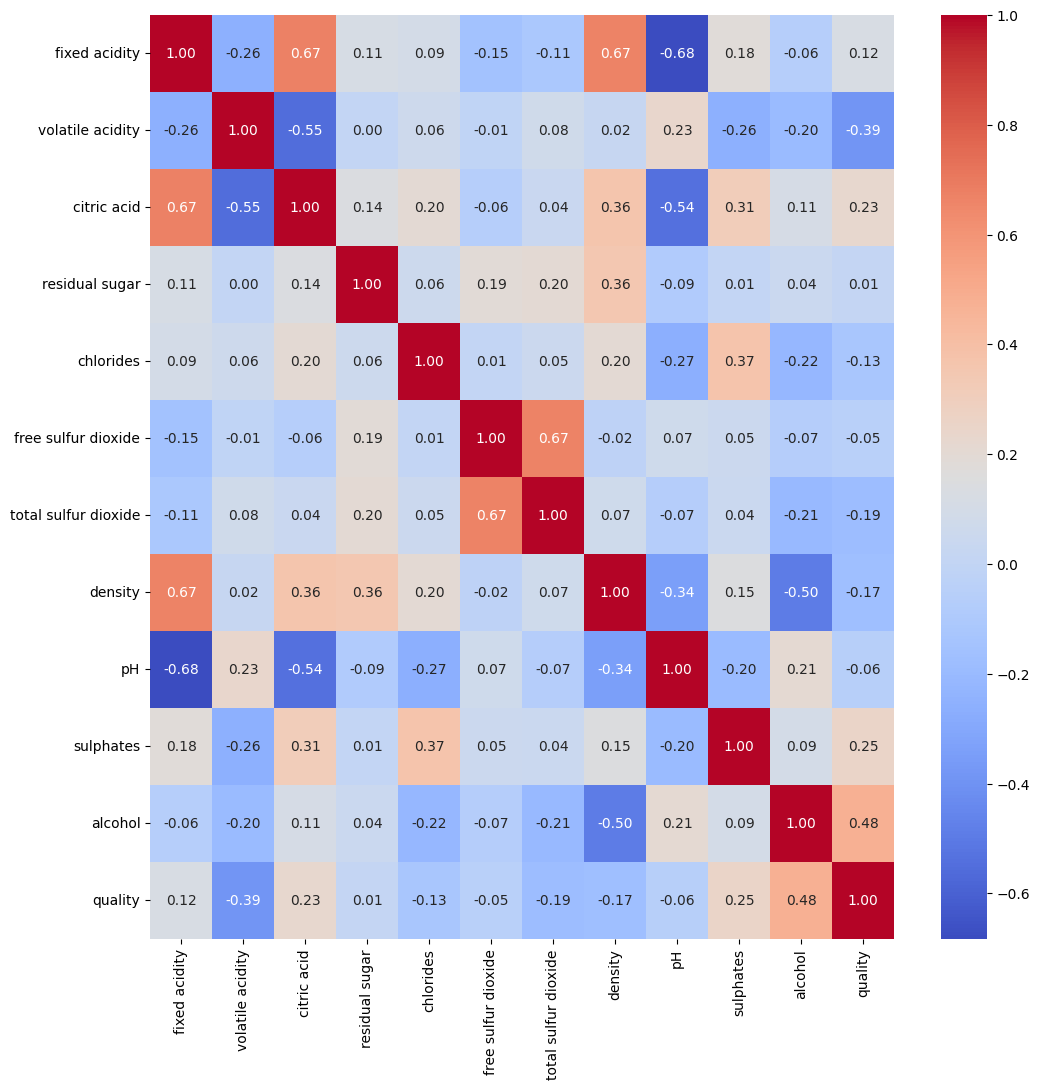

In [13]:
# 히트맵으로 그리기
import seaborn as sns

plt.figure(figsize=(12,12))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')

In [14]:
# 와인 등급별 평균 알콜 도수와 평균 당도
df.groupby('quality')[['residual sugar', 'alcohol']].mean()

,residual sugar,alcohol
quality,,
3,2.635000,9.955000
4,2.694340,10.265094
5,2.528855,9.899706
6,2.477194,10.629519
7,2.720603,11.465913
8,2.577778,12.094444


In [15]:
# outlier - 이상치 제거
# 조건부 필터링: fixed acidity, pH가 각각 3이상, 4이상인 데이터만 추출

df[(df['fixed acidity'] >= 3) & (df['pH'] >= 4)] # boolean indexing

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1316,5.4,0.74,0.0,1.2,0.041,16.0,46.0,0.99258,4.01,0.59,12.5,6
1321,5.0,0.74,0.0,1.2,0.041,16.0,46.0,0.99258,4.01,0.59,12.5,6


In [19]:
# 모델링
# (1) 학습데이터(모의고사), 실습데이터(수능) 분리
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.25)

# (2) 분리한 데이터를 csv 형태로 저장
train.to_csv('wine_train.csv')
test.to_csv('wine_test.csv')

In [23]:
# (3) 학습용, 테스트용 데이터 로드 => 피처데이터랑 레이블(타겟) 데이터

X_train = train.drop(['quality'], axis=1)
X_test = test.drop(['quality'], axis=1)

y_train = train['quality']
y_test = test['quality']

X_train.shape, X_test.shape
y_train.shape, y_test.shape

((1199,), (400,))

In [29]:
# (4) mlflow load

import mlflow
import mlflow.sklearn
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from itertools import product

mlflow.autolog()

mlflow.set_tracking_uri('http://127.0.0.1:5000')
mlflow.set_experiment(experiment_name='wine_quality_experiment')

alpha = [0.2, 0.5, 0.7, 1.0]
l1_ratio = [0.2, 0.3, 0.7, 1.0]

for a, l in product(alpha, l1_ratio):
    with mlflow.start_run(nested=True):
        lr = ElasticNet(alpha=a, l1_ratio=l, random_state=123)
        lr.fit(X_train, y_train)

        predict = lr.predict(X_test)

        # 모델 성능 평가 => SageMaker
        rmse = np.sqrt(mean_squared_error(y_test, predict)) # MSE
        mae = mean_absolute_error(y_test, predict)
        r2 = r2_score(y_test, predict)

        # log 기록
        mlflow.log_param('alpha', a)
        mlflow.log_param('l1_ratio', l)

        mlflow.log_metric('rmse', rmse)
        mlflow.log_metric('mae', mae)
        mlflow.log_metric('r2', r2)

        mlflow.sklearn.log_model(lr, 'wine_quality_model')

2024/08/19 11:25:19 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2024/08/19 11:25:22 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.
2024/08/19 11:25:22 INFO mlflow.tracking._tracking_service.client: 🏃 View run funny-wolf-69 at: http://127.0.0.1:5000/#/experiments/680392000428840991/runs/ea0da5b0195541eabcabe75b69dcef5c.
2024/08/19 11:25:22 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://127.0.0.1:5000/#/experiments/680392000428840991.
2024/08/19 11:25:24 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.
2024/08/19 11:25:24 INFO mlflow.tracking._tracking_service.client: 🏃 View run indecisive-toad-876 at: http://127.0.0.1:5000/#/experiments/680392000428840991/runs/db263cfba2e348bd99748f8f989999cc.
2024/08/19 11:25:24 INFO mlflow.tr